In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import time
import scipy as sp
import time


import numpy as np
from scipy import integrate

# Define a simple function
def integrand(x):
    return x**2

# Compute the integral of the function
result, _ = integrate.quad(integrand, 0, 1)
print("Integral of x^2 from 0 to 1:", result)

1. Use NumPy to create a large random array of floating-point numbers.

2. Compute the mean and standard deviation using both NumPy and SciPy.

3. Compare the results and execution time to understand the efficiency or additional features provided by SciPy.


In [17]:
arr = np.random.normal(0, 1, 1000)
arr_mean = np.mean(arr)
arr_std = np.std(arr)
print(f"Mean: {arr_mean}, Std Dev: {arr_std}")
mean_scipy = stats.tmean(arr)
std_scipy = stats.tstd(arr)
print(f"Mean (SciPy): {mean_scipy}, Std Dev (SciPy): {std_scipy}")

Mean: 0.03931254002955733, Std Dev: 1.0017051772119479
Mean (SciPy): 0.03931254002955733, Std Dev (SciPy): 1.0022064057533024


In [ ]:
start_np = time.time()
arr_mean_np = np.mean(arr)
arr_std_np = np.std(arr)
end_np = time.time()

start_sp = time.time()
arr_mean_sp = stats.tmean(arr)
arr_std_sp = stats.tstd(arr)
end_sp = time.time()

print(f"NumPy - Mean: {arr_mean_np}, Std: {arr_std_np}, Time: {end_np - start_np:.6f} seconds")
print(f"SciPy - Mean: {arr_mean_sp}, Std: {arr_std_sp}, Time: {end_sp - start_sp:.6f} seconds")

NumPy - Mean: 0.03931254002955733, Std: 1.0017051772119479, Time: 0.000181 seconds
SciPy - Mean: 0.03931254002955733, Std: 1.0022064057533024, Time: 0.000637 seconds


In [19]:
arr = np.random.rand(10_000_000)

# NumPy
%timeit np.mean(arr)

# SciPy
%timeit stats.tmean(arr)

4.67 ms ± 17 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.5 ms ± 328 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.5 ms ± 328 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numpy as np

daily_steps = np.random.randint(3000, 10000, size=50)

mean_np = np.mean(daily_steps)
median_np = np.median(daily_steps)
variance_np = np.var(daily_steps)
std_dev_np = np.std(daily_steps)
print(f"Daily Steps - NumPy: Mean: {mean_np}, Median: {median_np}, Variance: {variance_np}, Std Dev: {std_dev_np}")

Daily Steps - NumPy: Mean: 5635.14, Median: 5632.5, Variance: 3325075.2804, Std Dev: 1823.4788949697224


In [24]:
import scipy.stats as stats

mean_scipy = stats.tmean(daily_steps)
median_scipy = np.median(daily_steps)  # SciPy does not have a separate median function
variance_scipy = stats.tvar(daily_steps)
std_dev_scipy = stats.tstd(daily_steps)
print(f"Daily Steps - SciPy: Mean: {mean_scipy}, Median: {median_scipy}, Variance: {variance_scipy}, Std Dev: {std_dev_scipy}")

Daily Steps - SciPy: Mean: 5635.14, Median: 5632.5, Variance: 3392933.9595918367, Std Dev: 1841.9918456909186


In [25]:
skewness = stats.skew(daily_steps)
kurtosis = stats.kurtosis(daily_steps)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.12330952603623642, Kurtosis: -1.1694378255941975


1. Use the provided stock prices dataset (copy-paste from the bottom of the note).

2. Read the dataset using pandas and convert the relevant column to a NumPy array.

3. Calculate the mean, median, variance, and standard deviation of the stock prices.

4. Interpret the results in the context of financial data analysis.

Dataset code:

import pandas as pd
import numpy as np

# Simulating stock prices for a non-existent stock (DVLPRS)
np.random.seed(0)  # For reproducibility

# Generating 100 days of stock prices
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates))  # Assume a mean price of 100 with a standard deviation of 10

# Creating a DataFrame
stock_data = pd.DataFrame({
    'Date': dates,
    'DVLPRS_Price': prices
})

# Displaying the first few rows of the simulated data
print(stock_data.head())


In [26]:
# Simulating stock prices for a non-existent stock (DVLPRS)
np.random.seed(0)  # For reproducibility

# Generating 100 days of stock prices
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates))  # Assume a mean price of 100 with a standard deviation of 10

# Creating a DataFrame
stock_data = pd.DataFrame({
    'Date': dates,
    'DVLPRS_Price': prices
})

# Displaying the first few rows of the simulated data
print(stock_data.head())

        Date  DVLPRS_Price
0 2023-01-01    117.640523
1 2023-01-02    104.001572
2 2023-01-03    109.787380
3 2023-01-04    122.408932
4 2023-01-05    118.675580


In [27]:
converted_prices = stock_data['DVLPRS_Price'].values
print(f"Converted Prices: {converted_prices[:5]}")

Converted Prices: [117.64052346 104.00157208 109.78737984 122.40893199 118.6755799 ]


In [28]:
sci_mean = stats.tmean(converted_prices)
np_median = np.median(converted_prices)
sci_std = stats.tstd(converted_prices)
sci_var = stats.tvar(converted_prices)
print(f"SciPy Mean: {sci_mean}, NumPy Median: {np_median}, SciPy Std Dev: {sci_std}, SciPy Variance: {sci_var}")

SciPy Mean: 100.59808015534487, NumPy Median: 100.94096119437998, SciPy Std Dev: 10.129597692685017, SciPy Variance: 102.60874941564963


Le prix moyen est proche de 100, donc l’action est bien centrée autour de cette valeur.

La médiane plus haute que la moyenne indique quelques valeurs basses inhabituelles.

L’écart-type de 10 signifie une bonne volatilité (±10 autour de la moyenne).

Real-World Example:

    Imagine a scenario where two classrooms (Group A and Group B) are trying different teaching methods. We want to know if one method leads to significantly better performance on a test. A T-test can help us determine whether any observed differences in test scores are statistically significant.

Steps in Conducting a T-Test

1. Collect Data:

    Gather data from the two groups you are comparing. For instance, test scores from Group A and Group B.


2. Calculate Means:

    Use Python to find the average score for each group.


In [30]:
import numpy as np

# Sample data
group_a_scores = np.array([75, 88, 91, 83, 85])
group_b_scores = np.array([79, 90, 87, 88, 90])

# Calculate means
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)
print(f"Group A Mean: {mean_a}, Group B Mean: {mean_b}")

Group A Mean: 84.4, Group B Mean: 86.8


In [31]:
# Calculate standard deviation
std_a = np.std(group_a_scores, ddof=1)
std_b = np.std(group_b_scores, ddof=1)
print(f"Group A Std Dev: {std_a}, Group B Std Dev: {std_b}")

Group A Std Dev: 6.06630035524124, Group B Std Dev: 4.54972526643093


In [32]:
from scipy.stats import ttest_ind

# Perform T-test
t_stat, p_val = ttest_ind(group_a_scores, group_b_scores)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -0.7077213895435037, P-value: 0.4992141336832657


In [33]:
t_statistic = 2.5  # From the T-test
critical_value = 2.306  # From T-table or Python function

if abs(t_statistic) > critical_value:
  print("The difference is statistically significant.")
else:
  print("The difference is not statistically significant.")

The difference is statistically significant.


Example 2: Pharmaceutical Study

    Scenario: Comparing symptom improvement in patients taking a new drug versus a placebo.
    T-Statistic: 1.8
    P-Value: 0.08
    Interpretation:
        The T-statistic (1.8) is less than the critical value (around 2), and the P-value (0.08) is higher than 0.05. Therefore, we cannot conclude that the new drug is more effective than the placebo.

In both examples, the T-statistic and P-value together help us determine the significance of our results. A high T-statistic and a low P-value typically indicate a significant difference between the groups being compared.

    Interpreting the Result:
    If the absolute value of the T-statistic is greater than the critical value, it suggests that the difference in means is not likely due to random chance. In our example, since 2.5 (T-statistic) is greater than 2.306 (critical value), we can conclude that there is a statistically significant difference between the test scores of Group A and Group B.

    Insights:
    A statistically significant result implies that the teaching methods in the two groups likely had a different impact on the test scores. This can lead to further investigation into what aspects of the teaching method were more effective, potentially influencing future teaching strategies.


Scenario: Botanical Study

    Data: Petal lengths of Iris Setosa and Iris Versicolor species.
    Task: Determine if there is a significant difference in the petal lengths of these two Iris species.

Steps for the Exercise

1. Load and Prepare Data: You will load the Iris dataset and extract the petal lengths for the two species.

2. Perform the T-test: Calculate the T-statistic and P-value to compare the petal lengths.

3. Interpret the Results: Based on these values, determine if the differences in petal lengths are statistically significant.

Python Code for Data Preparation and T-test

from sklearn.datasets import load_iris
from scipy.stats import ttest_ind
import pandas as pd

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Extract petal lengths for Setosa and Versicolor
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Perform T-test
t_stat, p_val = ttest_ind(setosa_petal_length, versicolor_petal_length)

# Output the T-statistic and P-value
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)

Your Task:

    Execute the provided Python code to calculate the T-statistic and P-value.
    Analyze the results:
        Is the T-statistic high enough to suggest a significant difference in petal lengths?
        Does the P-value indicate that this difference is statistically significant?
    Discuss what your findings suggest about the petal lengths of these two Iris species.

After you've finished

    Add the following code to the code provided above and run it:
    Analze the plots and try to see the relatioship between the visual represantation of the distributions and the t/p values.

# Plotting the distributions
sns.histplot(setosa_petal_length, color="skyblue", label="Iris Setosa", kde=True)
sns.histplot(versicolor_petal_length, color="red", label="Iris Versicolor", kde=True)

# Adding titles and labels
plt.title(
    f"Iris Petal Length Comparison\nT-statistic: {t_stat:.2f}, P-value: {p_val:.2e}"
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.legend()

plt.show()


T-statistic : -39.493
P-value     : 0.00000
Seuil critique à 95% : ±1.984
Degrés de liberté : 98
✅ Résultat significatif : on rejette l'hypothèse nulle.


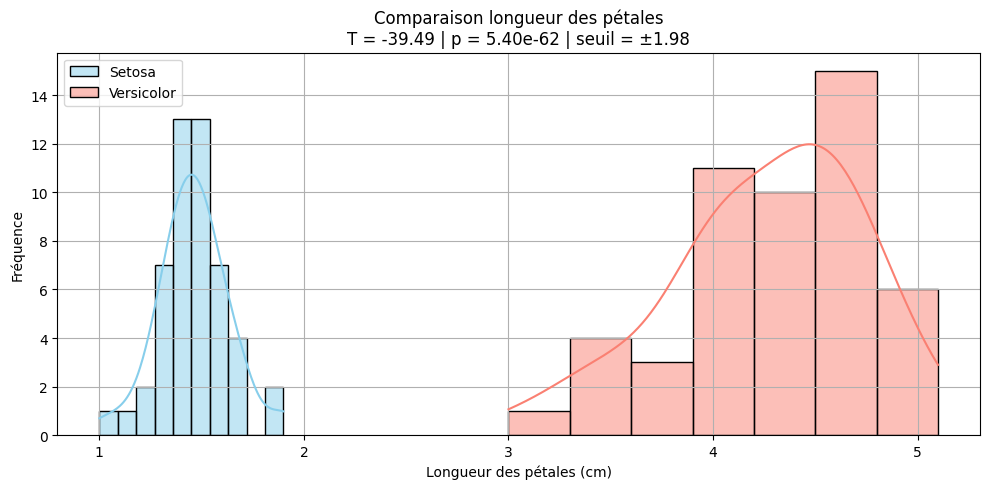

In [35]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les données
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 2. Extraire les longueurs de pétales
setosa = df[df['species'] == 'setosa']['petal length (cm)']
versicolor = df[df['species'] == 'versicolor']['petal length (cm)']

# 3. Statistiques descriptives
n1, n2 = len(setosa), len(versicolor)
mean1, mean2 = np.mean(setosa), np.mean(versicolor)
std1, std2 = np.std(setosa, ddof=1), np.std(versicolor, ddof=1)

# 4. T-test classique (Student)
t_stat, p_val = ttest_ind(setosa, versicolor, equal_var=True)

# 5. Calcul manuel du seuil critique (bilatéral, alpha = 0.05)
alpha = 0.05
ddl = n1 + n2 - 2
t_crit = t.ppf(1 - alpha / 2, df=ddl)

# 6. Affichage des résultats
print(f"T-statistic : {t_stat:.3f}")
print(f"P-value     : {p_val:.5f}")
print(f"Seuil critique à 95% : ±{t_crit:.3f}")
print(f"Degrés de liberté : {ddl}")

if abs(t_stat) > t_crit:
    print("✅ Résultat significatif : on rejette l'hypothèse nulle.")
else:
    print("❌ Pas significatif : on ne rejette pas l'hypothèse nulle.")

# 7. Visualisation
plt.figure(figsize=(10, 5))
sns.histplot(setosa, kde=True, color="skyblue", label="Setosa")
sns.histplot(versicolor, kde=True, color="salmon", label="Versicolor")
plt.title(f"Comparaison longueur des pétales\nT = {t_stat:.2f} | p = {p_val:.2e} | seuil = ±{t_crit:.2f}")
plt.xlabel("Longueur des pétales (cm)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. T-statistic très élevé:

    Plus la statistique t s’éloigne de zéro, plus la différence entre les deux groupes est importante.

    Ici, -39.49 est un score énorme : cela indique une énorme différence entre les deux groupes (Setosa et Versicolor).

    Le signe négatif indique simplement que la moyenne des longueurs de pétales de Setosa est inférieure à celle de Versicolor.

2. P-value extrêmement faible (≈ 0) :

    La p-value mesure la probabilité d’observer une telle différence entre les groupes par hasard si, en réalité, ils étaient identiques (hypothèse nulle).

    Ici, la p-value est bien inférieure à 0.05, donc :
    On rejette l’hypothèse nulle
    Il y a une différence significative entre les longueurs de pétales des deux espèces

Visualisation :

    La courbe bleue (Setosa) et la courbe rouge (Versicolor) ne se chevauchent presque pas.

    Cela confirme visuellement que ces deux groupes ont des longueurs de pétales très différentes.

